## ***Data Science Engineering Methods***
## ***Assignment 1 – ML Data Cleaning and Feature Selection***

Question:

ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.


Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013)Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## **Abstract:**

In this assignment, I'm using a public dataset from kaggle - "Avocado Prices". I will dive into data cleaning and feature selection. I would be identifying data types (numeric and categorical), dealing with missing values, assessing numeric variable distributions, and determining the importance of independent variables in predicting a target. Additionally, I'll examine missing data in independent variables, consistency between training and test sets, and predictor variable interdependence. I'll uncover crucial predictor variables, evaluate predictor variable ranges, and study their distributions. Outliers will be scrutinized for their effect on the predictive model. Lastly, I'll experiment with random data removal and imputation methods. For categorical data, accuracy and confusion matrices will be calculated. Adhering to the scoring rubric, I'll ensure data-backed answers, clear code explanations, and proper licensing, all executed within Google Colab.

In [71]:
#importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [72]:
#reading the dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Pritika-24/ML-Data-Cleaning-and-Feature-Selection/main/avocado.csv')

In [73]:
#displaying the dataset
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

###**Column Descriptions:**
In the given dataset, there are several columns that provide information about Hass avocados and their sales. Here's a description of each of the relevant columns:

1. **Date**: This column represents the date of the observation, indicating when the avocado sales data was recorded.

2. **AveragePrice**: This column contains the average price of a single avocado. It represents the typical cost of one avocado.

3. **Total Volume**: This column indicates the total number of avocados sold. It represents the overall quantity of avocados sold in a given observation.

4. **4046**: This column represents the total number of avocados with PLU (Product Lookup) code 4046 sold. PLU codes are used to identify specific types of avocados, and 4046 is one such code.

5. **4225**: Similar to the "4046" column, this column represents the total number of avocados with PLU code 4225 sold.

6. **4770**: This column indicates the total number of avocados with PLU code 4770 sold.

7. **Total Bags**: This column represents the total number of bags of avocados sold. It includes all types of bags, such as small, large, and extra-large bags.

8. **Small Bags**: This column specifies the number of small bags of avocados sold.

9. **Large Bags**: This column specifies the number of large bags of avocados sold.

10. **XLarge Bags**: This column specifies the number of extra-large bags of avocados sold.

11. **type**: This column indicates the type of avocados sold, which can be either "conventional" or "organic." It differentiates between avocados grown using different farming practices.

12. **year**: This column represents the year of the observation, providing the year in which the avocado sales data was recorded.

13. **region**: This column specifies the city or region where the avocado sales data was collected. It identifies the location of the observation.

These columns provide information about avocado sales, including pricing, volume, type (conventional or organic), and geographical location (region) of the sales data. The PLU codes (4046, 4225, 4770) are used to categorize avocados based on their variety or type.

**Now we start analysing the dataset**

In [74]:
#printing the number of observations and variables in the dataset
print(f"Dataset has {df.shape[0]} observations with {df.shape[1]} variables.")

Dataset has 18249 observations with 14 variables.


### **1. What are the data types? (Only numeric and categorical)**


In [75]:
#exploring the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


*This Avocado Prices Dataset has 3 Categorical features, and 11 Continuous features (2 Discrete quantitative features, and 9 Continuous quantitative features)*

In [76]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### **2. Are there missing values?**

In [77]:
#checking for missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [78]:
#checking NaN values in dataset
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

*There are no missing values or NaN values in this dataset, hence we do not need to apply methods to fill in the vacancy.*

## The target variable assumed in this dataset is the **Total Volume** column.

### **3.  What are the likely distributions of the numeric variables?**

In [79]:
#gives us the list of numerical columns and categorical columns
numerical_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",numerical_col)

categorical_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",categorical_col)

Numerical columns: 
 Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')
Categorical columns: 
 Index(['Date', 'type', 'region'], dtype='object')


In [81]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Date', 'type', 'region']

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [82]:
df.describe()

Unnamed: 0          Date  AveragePrice  Total Volume          4046  \
count  18249.000000  18249.000000  18249.000000  1.824900e+04  1.824900e+04   
mean      24.232232     83.997096      1.405978  8.506440e+05  2.930084e+05   
std       15.481045     48.787638      0.402677  3.453545e+06  1.264989e+06   
min        0.000000      0.000000      0.440000  8.456000e+01  0.000000e+00   
25%       10.000000     42.000000      1.100000  1.083858e+04  8.540700e+02   
50%       24.000000     84.000000      1.370000  1.073768e+05  8.645300e+03   
75%       38.000000    126.000000      1.660000  4.329623e+05  1.110202e+05   
max       52.000000    168.000000      3.250000  6.250565e+07  2.274362e+07   

               4225          4770    Total Bags    Small Bags    Large Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean   2.951546e+05  2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04   
std    1.204120e+06  1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.008780e+03  0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02   
50%    2.906102e+04  1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03   
75%    1.502069e+05  6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04   
max    2.047057e+07  2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06   

         XLarge Bags          type          year        region  
count   18249.000000  18249.000000  18249.000000  18249.000000  
mean     3106.426507      0.499918   2016.147899     26.495644  
std     17692.894652      0.500014      0.939938     15.583788  
min         0.000000      0.000000   2015.000000      0.000000  
25%         0.000000      0.000000   2015.000000     13.000000  
50%         0.000000      0.000000   2016.000000     26.000000  
75%       132.500000      1.000000   2017.000000     40.000000  
max    551693.650000      1.000000   2018.000000     53.000000

*We can again confirm that we have 3 categorical columns and 11 numerical columns.*


### **Using the Q-Q plot we will get a clear idea of the distribution of the Numerical columns**  

<Figure size 400x300 with 0 Axes>

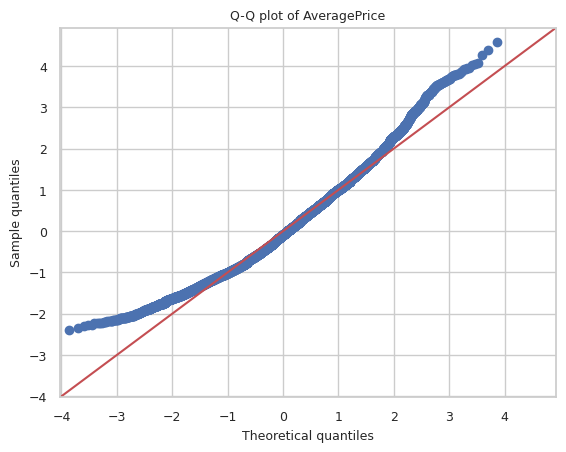

<Figure size 400x300 with 0 Axes>

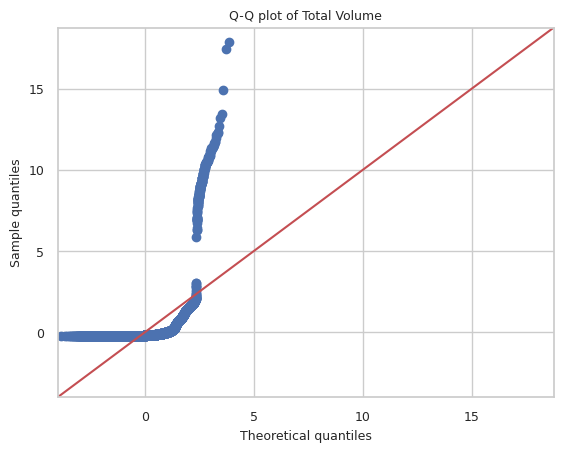

<Figure size 400x300 with 0 Axes>

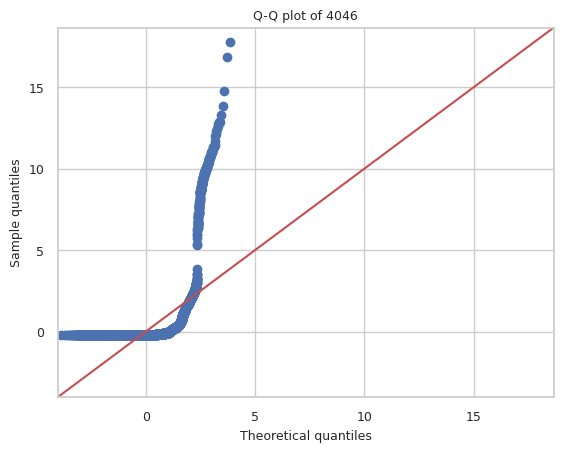

<Figure size 400x300 with 0 Axes>

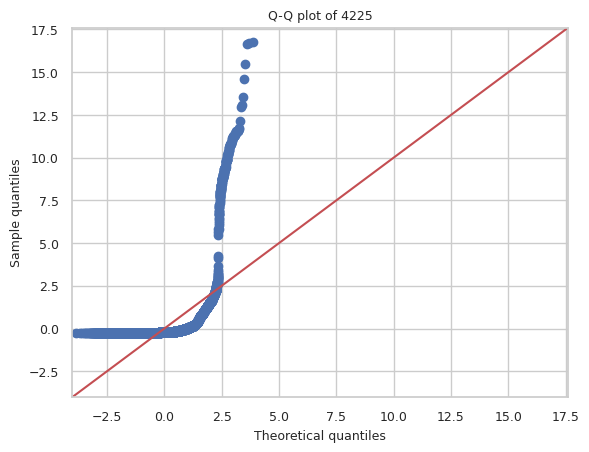

<Figure size 400x300 with 0 Axes>

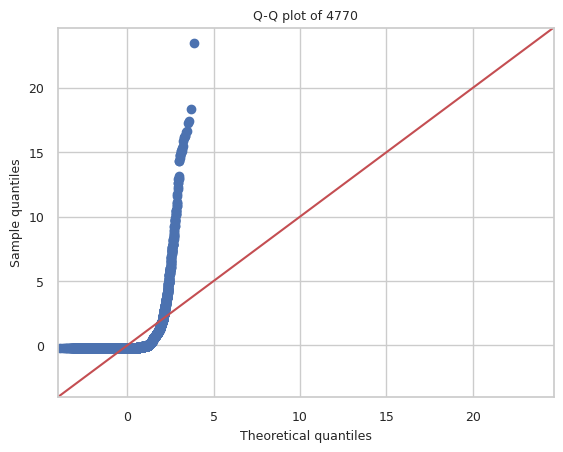

<Figure size 400x300 with 0 Axes>

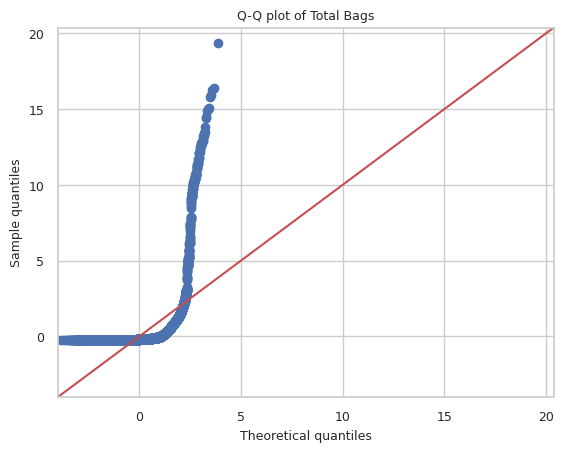

<Figure size 400x300 with 0 Axes>

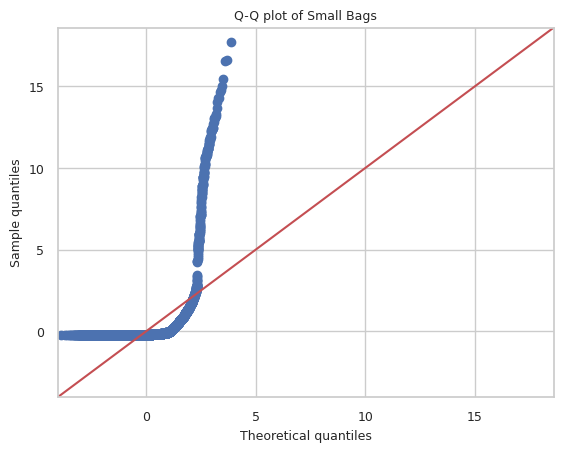

<Figure size 400x300 with 0 Axes>

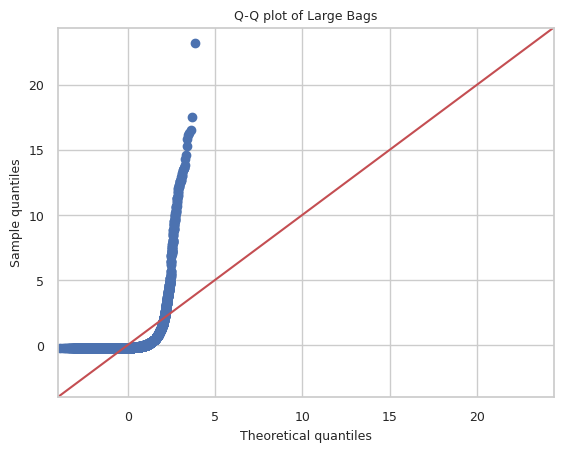

<Figure size 400x300 with 0 Axes>

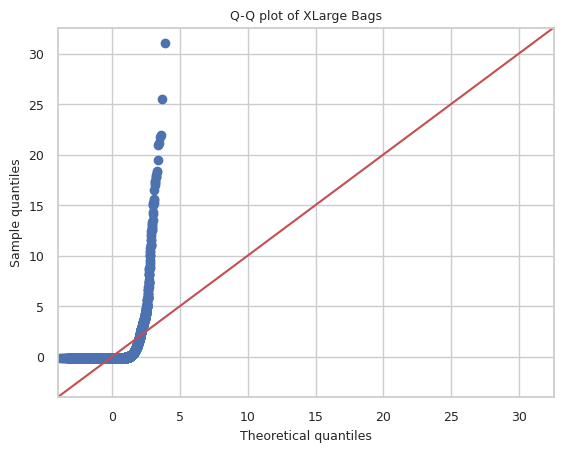

<Figure size 400x300 with 0 Axes>

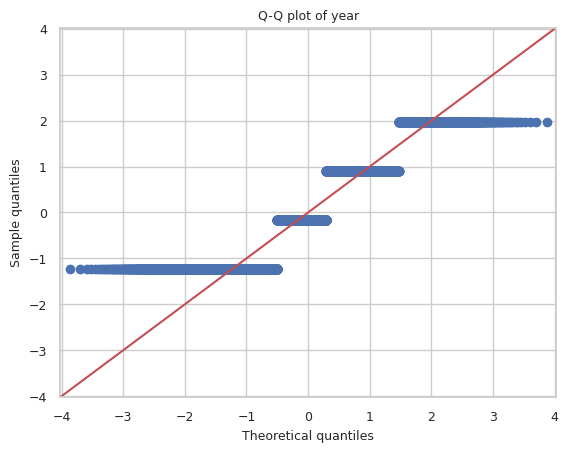

In [83]:
from statsmodels.graphics.gofplots import qqplot
df_norm=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

for c in df_norm.columns[:]:
  plt.figure(figsize=(4,3))
  fig=qqplot(df_norm[c],line='45',fit='True')
  plt.xticks(fontsize=9)
  plt.yticks(fontsize=9)
  plt.xlabel("Theoretical quantiles",fontsize=9)
  plt.ylabel("Sample quantiles",fontsize=9)
  plt.title("Q-Q plot of {}".format(c),fontsize=9)
  plt.grid(True)
  plt.show()

*From above quantile plots we can suggest that while Average Price might have a near normal distribution rest of them don't.*

*We can also notice outliers clearly in the plots.*

### **4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**



### Method 1: Correlation Analysis

In [84]:
df.corr()

Unnamed: 0      Date  AveragePrice  Total Volume      4046  \
Unnamed: 0      1.000000 -0.419926     -0.133008      0.014035  0.017628   
Date           -0.419926  1.000000      0.145514      0.009263 -0.005028   
AveragePrice   -0.133008  0.145514      1.000000     -0.192752 -0.208317   
Total Volume    0.014035  0.009263     -0.192752      1.000000  0.977863   
4046            0.017628 -0.005028     -0.208317      0.977863  1.000000   
4225            0.019829 -0.016895     -0.172928      0.974181  0.926110   
4770            0.041752 -0.047517     -0.179446      0.872202  0.833389   
Total Bags     -0.002219  0.064688     -0.177088      0.963047  0.920057   
Small Bags      0.000347  0.056902     -0.174730      0.967238  0.925280   
Large Bags     -0.009196  0.081855     -0.172940      0.880640  0.838645   
XLarge Bags    -0.011546  0.077374     -0.117592      0.747157  0.699377   
type           -0.000288 -0.000060      0.615845     -0.232434 -0.225819   
year           -0.171667  0.950274      0.093197      0.017193  0.003353   
region         -0.000489 -0.000101     -0.011716      0.174176  0.192073   

                  4225      4770  Total Bags  Small Bags  Large Bags  \
Unnamed: 0    0.019829  0.041752   -0.002219    0.000347   -0.009196   
Date         -0.016895 -0.047517    0.064688    0.056902    0.081855   
AveragePrice -0.172928 -0.179446   -0.177088   -0.174730   -0.172940   
Total Volume  0.974181  0.872202    0.963047    0.967238    0.880640   
4046          0.926110  0.833389    0.920057    0.925280    0.838645   
4225          1.000000  0.887855    0.905787    0.916031    0.810015   
4770          0.887855  1.000000    0.792314    0.802733    0.698471   
Total Bags    0.905787  0.792314    1.000000    0.994335    0.943009   
Small Bags    0.916031  0.802733    0.994335    1.000000    0.902589   
Large Bags    0.810015  0.698471    0.943009    0.902589    1.000000   
XLarge Bags   0.688809  0.679861    0.804233    0.806845    0.710858   
type         -0.232289 -0.210027   -0.217788   -0.220535   -0.193177   
year         -0.009559 -0.036531    0.071552    0.063915    0.087891   
region        0.145726  0.095252    0.175256    0.164702    0.198768   

              XLarge Bags      type      year    region  
Unnamed: 0      -0.011546 -0.000288 -0.171667 -0.000489  
Date             0.077374 -0.000060  0.950274 -0.000101  
AveragePrice    -0.117592  0.615845  0.093197 -0.011716  
Total Volume     0.747157 -0.232434  0.017193  0.174176  
4046             0.699377 -0.225819  0.003353  0.192073  
4225             0.688809 -0.232289 -0.009559  0.145726  
4770             0.679861 -0.210027 -0.036531  0.095252  
Total Bags       0.804233 -0.217788  0.071552  0.175256  
Small Bags       0.806845 -0.220535  0.063915  0.164702  
Large Bags       0.710858 -0.193177  0.087891  0.198768  
XLarge Bags      1.000000 -0.175483  0.081033  0.082281  
type            -0.175483  1.000000 -0.000032 -0.000280  
year             0.081033 -0.000032  1.000000 -0.000055  
region           0.082281 -0.000280 -0.000055  1.000000

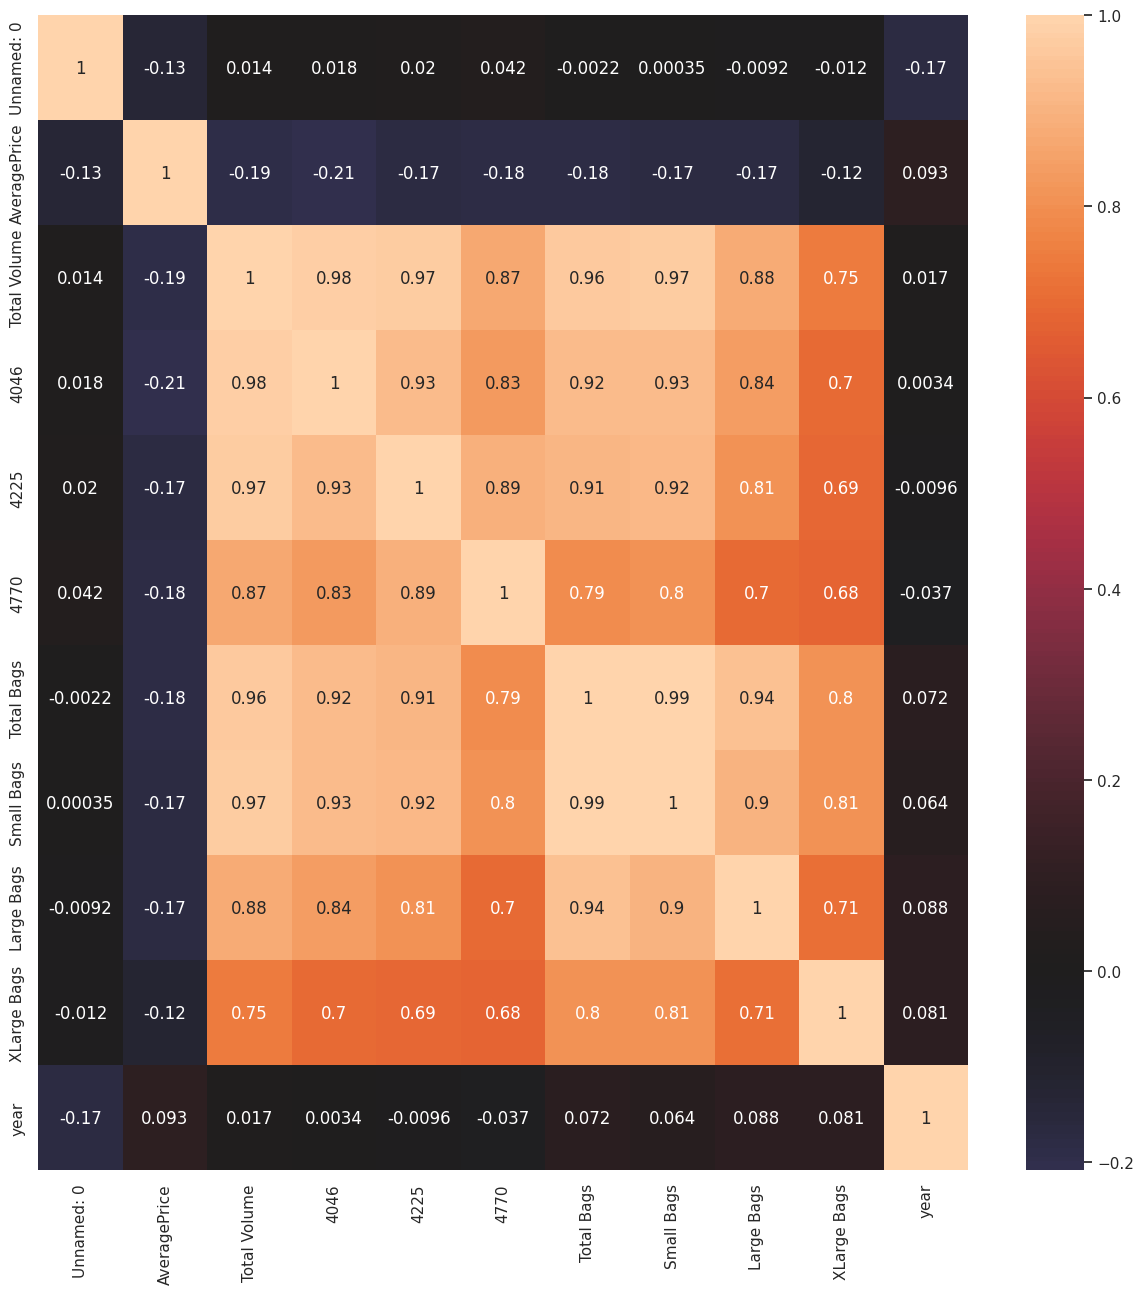

In [85]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df[numerical_col].corr(), annot=True,center=0)

In [86]:
correlation_matrix = df.corr()

# Set a threshold for correlation strength (e.g., absolute correlation coefficient >= 0.5)
correlation_threshold = 0.5

# Filter out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Create a heatmap to visualize the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

*As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.*

*The correlation close to 1 indicates that it is strongly correlated, and the values closer to 0 are a weak correlation.*

*This narrows down the list of possible predictors to start with for modelling.*

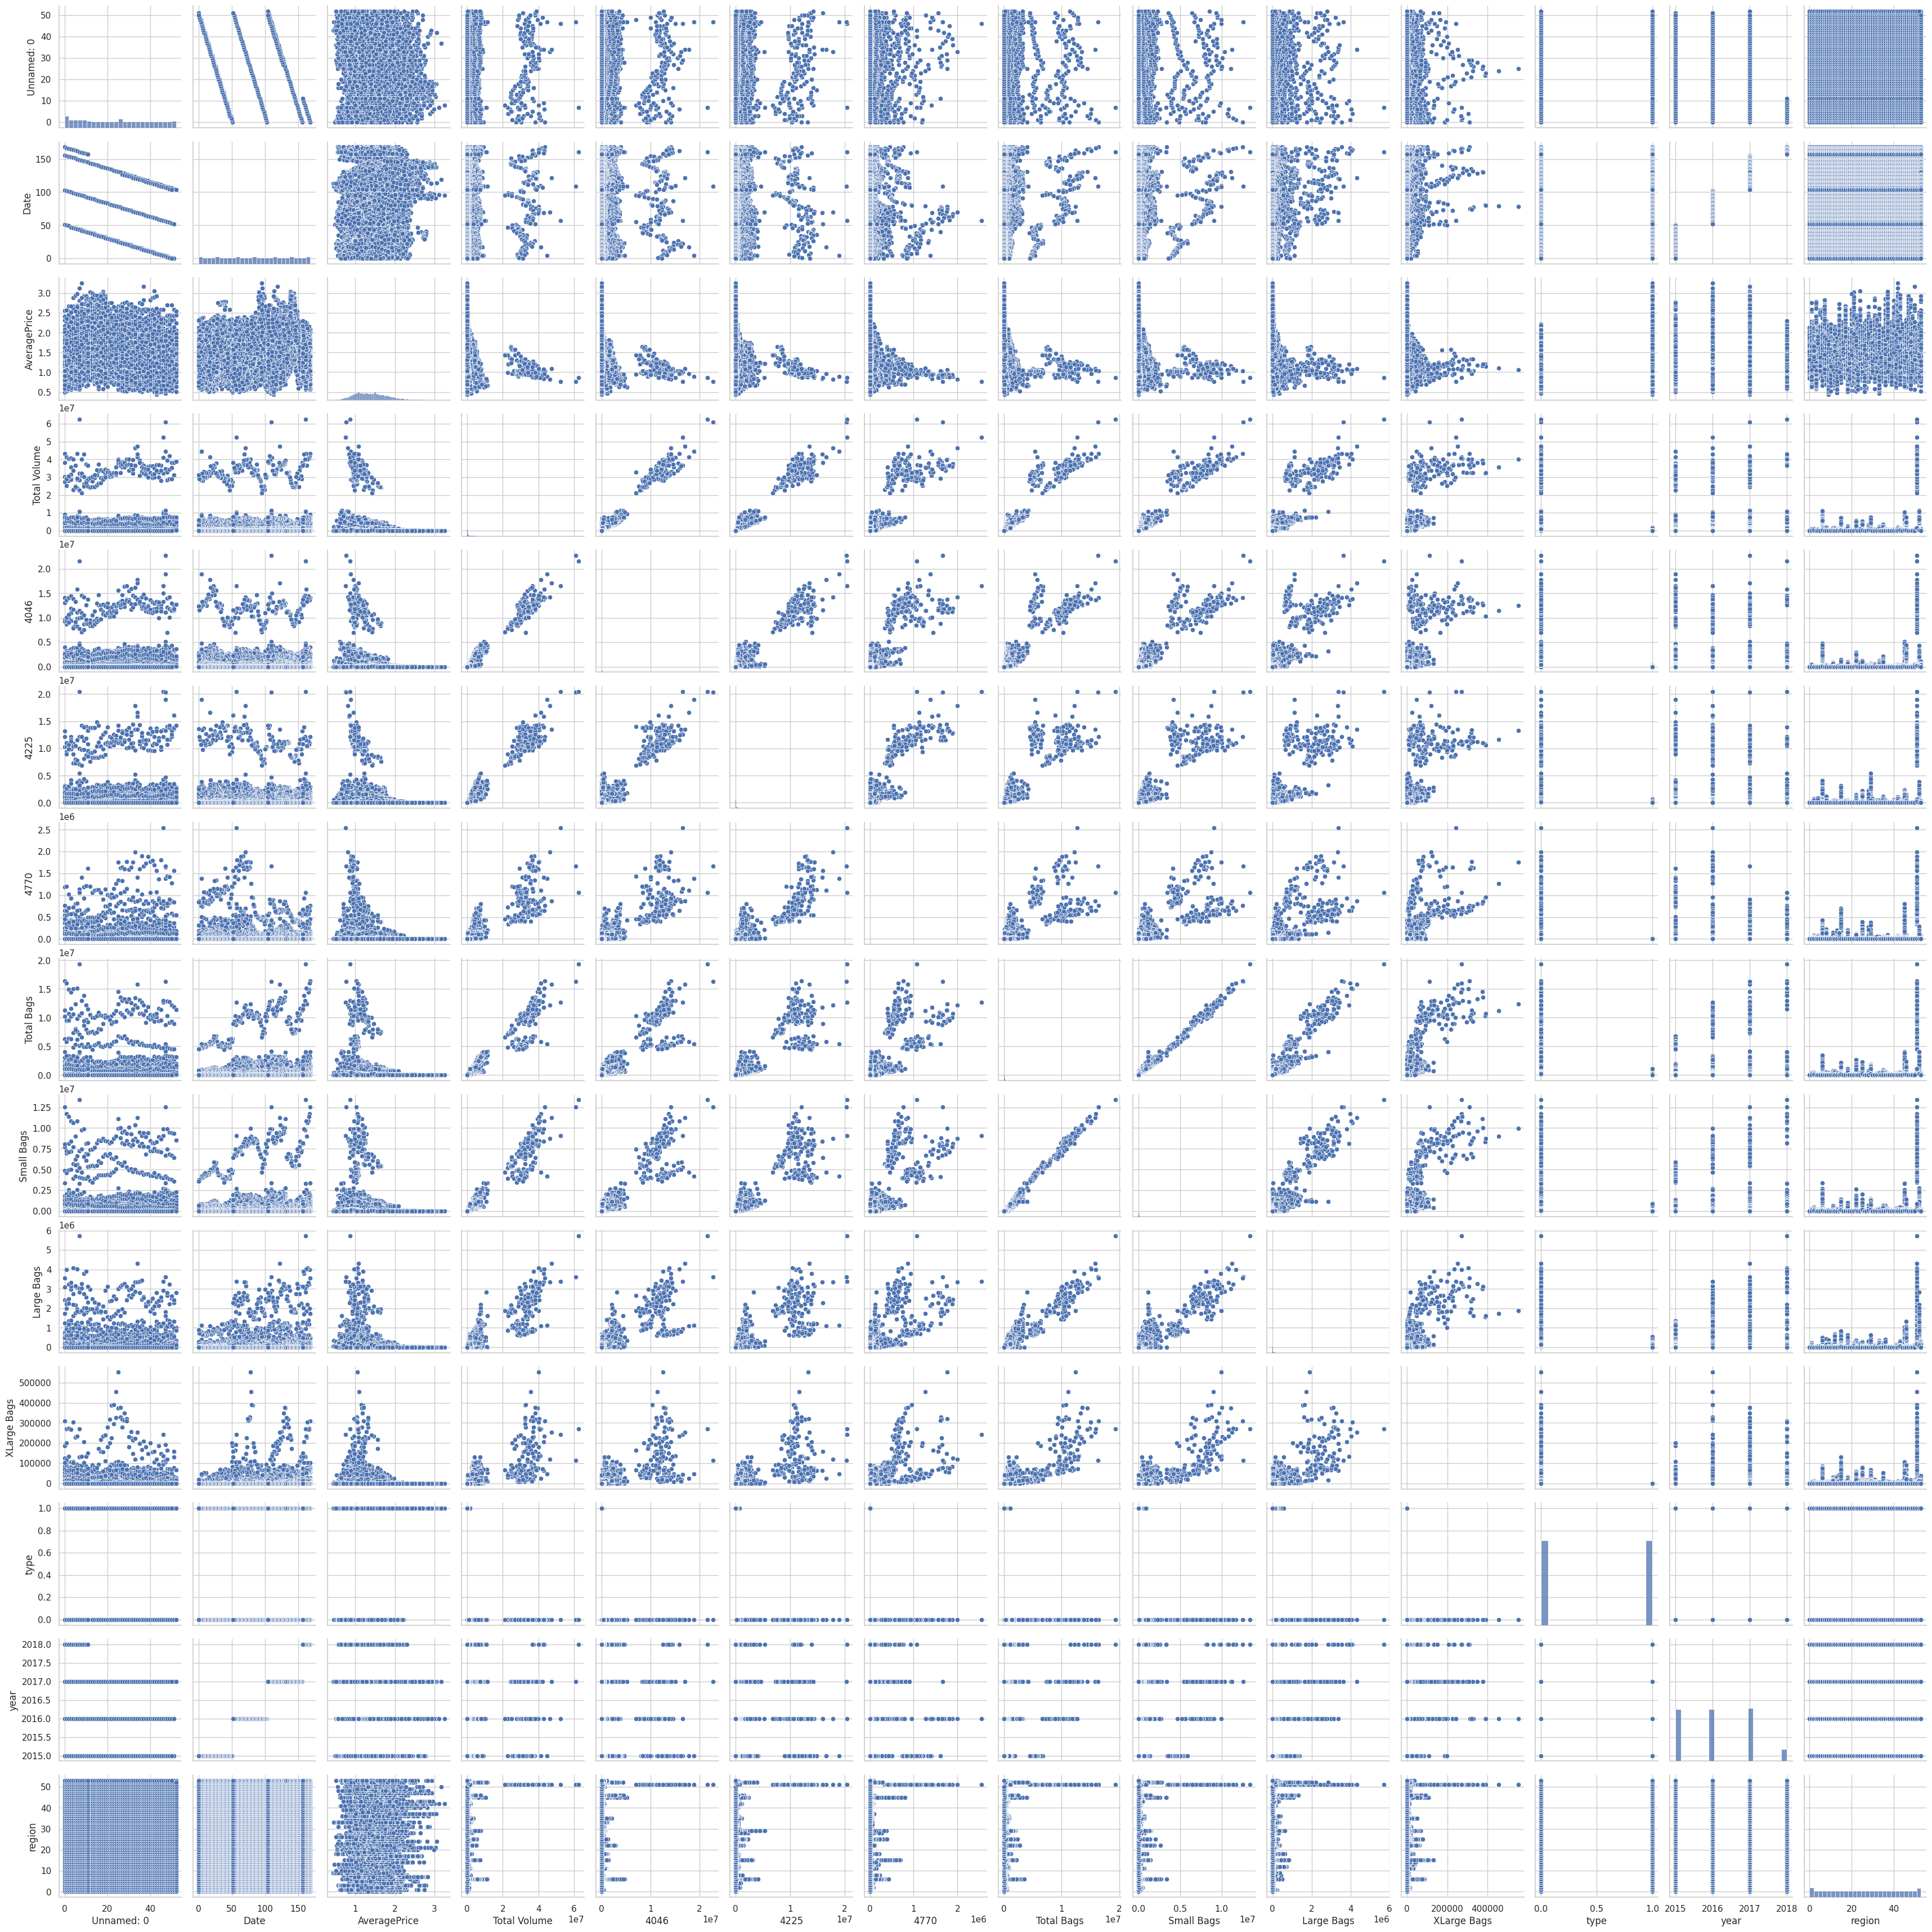

In [87]:
# pair plot to check the colinearity
sns.pairplot(df)

*Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Heighest correlation is between Total Bags and Small Bags.*

###Method 2: Feature Selection

In [88]:
!pip install eli5

In [89]:
from sklearn.model_selection import train_test_split

X = df[['AveragePrice', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]
y = df['Total Volume']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [90]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [91]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

*Eli5 clearly shows us the features that are necessary for the prediction of the target variable: Total Volume.*

###Method 3: OLS

In [92]:
import statsmodels.api as sm

# Assuming X is your feature matrix and y is your target variable
X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]  # Specify the features
X = sm.add_constant(X)  # Add a constant (intercept) term
y = df['Total Volume']
df.dropna(inplace=True)
model = sm.OLS(y, X).fit()

# Get summary statistics of the OLS model
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Total Volume   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.964e+12
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:29:12   Log-Likelihood:                -97009.
No. Observations:               18249   AIC:                         1.940e+05
Df Residuals:                   18239   BIC:                         1.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4779.1214    803.275     -5.950   

In [93]:
# Defining the independent variables (features) and the dependent variable
X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]  # Include all your independent variables
y = df['Total Volume']  # Replace with the name of your dependent variable

# Geting the summary of the regression model
summary = model.summary()

# Extracting p-values for each independent variable using integer indices
p_values = model.pvalues[1:]  # Exclude the constant term (intercept)

# Setting a significance level (e.g., 0.05) for feature selection.
# Variables with p-values less than or equal to this significance level are considered significant.
significance_level = 0.05

# Filtering out important independent variables based on p-values
important_vars = [var for var, p_value in zip(X.columns, p_values) if p_value < significance_level]

# Printing the important variables
print("Important Independent Variables:")
print(important_vars)

Important Independent Variables:
['AveragePrice', '4046', '4225', '4770', 'year']


###**5. Which independent variables have missing data? How much?**


*None of the independent variables have missing values.*

### **6. Do the training and test sets have the same data?**



In [94]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (e.g., 80% training, 20% test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [95]:
train_data.describe()

Unnamed: 0          Date  AveragePrice  Total Volume          4046  \
count  14599.000000  14599.000000  14599.000000  1.459900e+04  1.459900e+04   
mean      24.140078     84.120967      1.404860  8.486369e+05  2.934236e+05   
std       15.455314     48.858158      0.403128  3.404709e+06  1.243118e+06   
min        0.000000      0.000000      0.440000  8.456000e+01  0.000000e+00   
25%       10.000000     42.000000      1.100000  1.086533e+04  8.547250e+02   
50%       24.000000     84.000000      1.370000  1.091119e+05  8.762480e+03   
75%       38.000000    127.000000      1.660000  4.354375e+05  1.113795e+05   
max       52.000000    168.000000      3.170000  5.228870e+07  1.778761e+07   

               4225          4770    Total Bags    Small Bags    Large Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   
mean   2.943944e+05  2.277926e+04  2.380376e+05  1.808815e+05  5.403939e+04   
std    1.195564e+06  1.076246e+05  9.670539e+05  7.305218e+05  2.401997e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.997545e+03  0.000000e+00  5.121780e+03  2.884600e+03  1.236350e+02   
50%    2.971125e+04  1.905800e+02  4.012544e+04  2.655889e+04  2.693840e+03   
75%    1.507282e+05  6.231185e+03  1.115398e+05  8.370342e+04  2.242839e+04   
max    2.047057e+07  2.546439e+06  1.639452e+07  1.254033e+07  4.324231e+06   

         XLarge Bags          type          year        region  
count   14599.000000  14599.000000  14599.000000  14599.000000  
mean     3116.713649      0.499555   2016.148777     26.513528  
std     17607.337329      0.500017      0.940367     15.588548  
min         0.000000      0.000000   2015.000000      0.000000  
25%         0.000000      0.000000   2015.000000     13.000000  
50%         0.000000      0.000000   2016.000000     27.000000  
75%       133.925000      1.000000   2017.000000     40.000000  
max    551693.650000      1.000000   2018.000000     53.000000

In [96]:
test_data.describe()


Unnamed: 0         Date  AveragePrice  Total Volume          4046  \
count  3650.000000  3650.000000   3650.000000  3.650000e+03  3.650000e+03   
mean     24.600822    83.501644      1.410452  8.586718e+05  2.913478e+05   
std      15.580213    48.508052      0.400890  3.642811e+06  1.349105e+06   
min       0.000000     0.000000      0.490000  3.798200e+02  0.000000e+00   
25%      10.250000    41.000000      1.100000  1.068512e+04  8.514675e+02   
50%      24.000000    83.000000      1.380000  1.037585e+05  8.241890e+03   
75%      38.000000   125.000000      1.670000  4.222137e+05  1.101924e+05   
max      52.000000   168.000000      3.250000  6.250565e+07  2.274362e+07   

               4225          4770    Total Bags    Small Bags    Large Bags  \
count  3.650000e+03  3.650000e+03  3.650000e+03  3.650000e+03  3.650000e+03   
mean   2.981952e+05  2.308163e+04  2.460451e+05  1.874470e+05  5.553280e+04   
std    1.237917e+06  1.068340e+05  1.059638e+06  8.058499e+05  2.585130e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.014557e+03  0.000000e+00  4.944945e+03  2.668965e+03  1.441625e+02   
50%    2.658178e+04  1.678150e+02  3.893312e+04  2.541366e+04  2.495090e+03   
75%    1.460299e+05  6.301070e+03  1.085718e+05  8.201243e+04  2.058995e+04   
max    2.044550e+07  1.896150e+06  1.937313e+07  1.338459e+07  5.719097e+06   

         XLarge Bags         type         year       region  
count    3650.000000  3650.000000  3650.000000  3650.000000  
mean     3065.280759     0.501370  2016.144384    26.424110  
std     18033.430636     0.500067     0.938345    15.566664  
min         0.000000     0.000000  2015.000000     0.000000  
25%         0.000000     0.000000  2015.000000    13.000000  
50%         0.000000     1.000000  2016.000000    26.000000  
75%       128.607500     1.000000  2017.000000    40.000000  
max    390478.730000     1.000000  2018.000000    53.000000

*The data in both sets are not identical but the distribution is the same.*

*The means of both datasets show minimal or no distinction, implying that the average values of the data points in the two datasets are quite similar.*

*However, there is an mild contrast in the standard deviations (STD) of the two datasets, indicating a disparity in the variability or dispersion of data points between them.*

### **7. Is the predictor variables independent of all the other predictor variables?**

In [97]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'df' with your predictor variables
# Exclude the specific column you want to ignore
exclude_column = 'Unnamed: 0'
predictors = [col for col in df.columns if col != exclude_column]

# Create a DataFrame containing only the selected predictors
X = df[predictors]

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Format the VIF values to two decimal points
vif["VIF"] = ["{:.2f}".format(value) for value in vif["VIF"]]

# Print the VIF values
print(vif)

        Variable                 VIF
0           Date                4.32
1   AveragePrice               22.71
2   Total Volume       5226351820.65
3           4046        696555529.43
4           4225        634990319.54
5           4770          4986686.14
6     Total Bags  250199979298360.88
7     Small Bags  142971416741920.50
8     Large Bags   15214863605981.41
9    XLarge Bags      78563260514.62
10          type                3.39
11          year               20.04
12        region                4.16


*It's clear that we have a multicollinearity issue in the dataset. Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other, and it can lead to unstable and unreliable coefficient estimates in regression analysis.*

Here are some observations from the VIF values:



1.   *Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, and Large Bags all
have extremely high VIF values. This indicates strong multicollinearity among these variables. In particular, Total Bags and Small Bags have extremely high VIF values, suggesting that they are highly correlated with many other variables in the dataset.*

2.  *AveragePrice and year have relatively high VIF values as well, although not as extreme as some of the other variables.*

3. *XLarge Bags has a VIF value that's still relatively high, but lower than some of the other variables.*



### **8. Which Predictor variables are the most important?**


In [98]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist(), top=7)

*From the above given features, the top 4 are the most important predictor variables with the '4225' type PLU code avocados sold being the variable which has the highest impact on predicting the 'Total Volume'.*

### **9. Do the ranges of the predictor variables make sense?**

In [99]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [100]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']])
plt.ylim(0, 500000) # set y-axis range

labels = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=8)


plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

*The presence of numerous outliers in the boxplot suggests that the ranges of the independent variables are not logically defined or do not align with the expected values.*

*In the context of building a predictive model, it's crucial to ensure that the ranges of the independent variables are consistent. When the ranges of these variables vary significantly, it can potentially hinder model performance. To address this issue, it's advisable to continue the process of feature scaling, which involves transforming the values of the features to a common and standardized scale, ultimately enhancing the model's ability to learn effectively.*

### **10. What are the distributions of the predictor variables?**

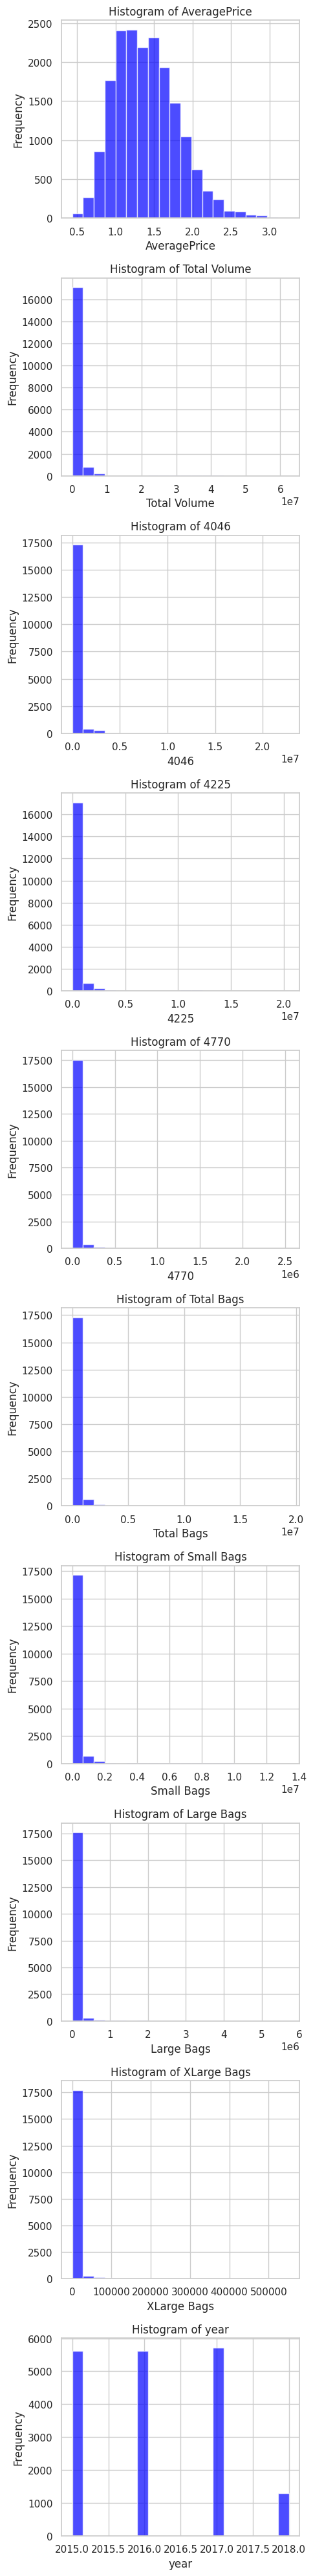

In [101]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_names' is a list of column names you want to plot
column_names = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

# Set the number of bins for the histograms (adjust as needed)
num_bins = 20

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(5, 4 * len(column_names)))

# Loop through each variable and create a histogram
for i, column in enumerate(column_names):
    ax = axes[i]

    # Plot the histogram
    ax.hist(df[column], bins=num_bins, color='blue', alpha=0.7)

    # Set labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### **11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [102]:
# Split the data into training and test sets (80% training, 20% test)
# Split your data into features (X) and the target variable (y)
X = df.drop(columns=['Total Volume'])
y = df['Total Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 161271309071.3324
R-squared (R2): 0.9878436610268341


In [104]:
#Removing the outliers
z_score_threshold = 3
data = df.copy()
for column in data.select_dtypes(include=[np.number]).columns:
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    data = data[z_scores <= z_score_threshold]

# df_no_outliers now contains the DataFrame with outliers removed

X = data.drop(columns=['Total Volume'])
y = data['Total Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 113186144.34075995
R-squared (R2): 0.9981143860364051


*Here we notice that the values of MSE (Mean Squared error) and R-squared changed significantly after we removed the outliers.*

### **12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data, and check for bias and variance of the error**

In [106]:
print(data.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [107]:
#Copying the data in 'Total Volume' column into different sub columns for removing the data
data_totalvolume = data[['Total Volume']]
data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_10_percent'] = data[['Total Volume']]
data_totalvolume

<ipython-input-107-3c5bca984778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
<ipython-input-107-3c5bca984778>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
<ipython-input-107-3c5bca984778>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Total Volume  totalvolume_copy_1_percent  totalvolume_copy_5_percent  \
0          64236.62                    64236.62                    64236.62   
1          54876.98                    54876.98                    54876.98   
2         118220.22                   118220.22                   118220.22   
3          78992.15                    78992.15                    78992.15   
4          51039.60                    51039.60                    51039.60   
...             ...                         ...                         ...   
18244      17074.83                    17074.83                    17074.83   
18245      13888.04                    13888.04                    13888.04   
18246      13766.76                    13766.76                    13766.76   
18247      16205.22                    16205.22                    16205.22   
18248      17489.58                    17489.58                    17489.58   

       totalvolume_copy_10_percent  
0                         64236.62  
1                         54876.98  
2                        118220.22  
3                         78992.15  
4                         51039.60  
...                            ...  
18244                     17074.83  
18245                     13888.04  
18246                     13766.76  
18247                     16205.22  
18248                     17489.58  

[14951 rows x 4 columns]

In [109]:
#Defining a function to get the missing data from the columns
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

In [110]:
get_percent_missing(data_totalvolume)

column_name  percent_missing
Total Volume                                Total Volume              0.0
totalvolume_copy_1_percent    totalvolume_copy_1_percent              0.0
totalvolume_copy_5_percent    totalvolume_copy_5_percent              0.0
totalvolume_copy_10_percent  totalvolume_copy_10_percent              0.0

In [111]:
#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [112]:
# Create missing data in each col
create_missing(data_totalvolume, 0.01, 'totalvolume_copy_1_percent')
create_missing(data_totalvolume, 0.05, 'totalvolume_copy_5_percent')
create_missing(data_totalvolume, 0.1, 'totalvolume_copy_10_percent')

<ipython-input-111-fa51350b8831>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [113]:
get_percent_missing(data_totalvolume)

column_name  percent_missing
Total Volume                                Total Volume         0.000000
totalvolume_copy_1_percent    totalvolume_copy_1_percent         1.003277
totalvolume_copy_5_percent    totalvolume_copy_5_percent         5.003010
totalvolume_copy_10_percent  totalvolume_copy_10_percent         9.999331

In [114]:
# Store the indices of missing rows
totalvolume_1_idx = list(np.where(data_totalvolume['totalvolume_copy_1_percent'].isna())[0])
totalvolume_5_idx = list(np.where(data_totalvolume['totalvolume_copy_5_percent'].isna())[0])
totalvolume_10_idx = list(np.where(data_totalvolume['totalvolume_copy_10_percent'].isna())[0])

In [115]:
print(f"The length of totalvolume 1 index is {len(totalvolume_1_idx)} and contains {(len(totalvolume_1_idx)/len(data_totalvolume['totalvolume_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_1_percent'])}")
print(f"The length of totalvolume 5 index is {len(totalvolume_5_idx)} and contains {(len(totalvolume_5_idx)/len(data_totalvolume['totalvolume_copy_5_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_5_percent'])}")
print(f"The length of totalvolume 10 index is {len(totalvolume_10_idx)} and contains {(len(totalvolume_10_idx)/len(data_totalvolume['totalvolume_copy_10_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_10_percent'])}")


The length of totalvolume 1 index is 150 and contains 1.0032773727509865% of the total data in the column | Total rows: 14951
The length of totalvolume 5 index is 748 and contains 5.003009832118253% of the total data in the column | Total rows: 14951
The length of totalvolume 10 index is 1495 and contains 9.999331148418165% of the total data in the column | Total rows: 14951


In [116]:
#Finding out the missing values present after removing the data
data_totalvolume.isnull().sum()

Total Volume                      0
totalvolume_copy_1_percent      150
totalvolume_copy_5_percent      748
totalvolume_copy_10_percent    1495
dtype: int64

Method 1: KNN imputer

In [117]:
#Perfomring scaling before KNN imputation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_totalvolume = pd.DataFrame(scaler.fit_transform(data_totalvolume))
data_totalvolume.head()

#Knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_totalvolume = pd.DataFrame(imputer.fit_transform(data_totalvolume))

#Checking for missing values
data_totalvolume.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [118]:
#Calculating the average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_totalvolume[0].mean() - data_totalvolume[1].mean())
print('The variance in 5% imputation column is: ', data_totalvolume[0].mean() - data_totalvolume[2].mean())
print('The variance in 10% imputation column is: ', data_totalvolume[0].mean() - data_totalvolume[3].mean())

The variance in 1% imputation column is:  7.332685429684016e-07
The variance in 5% imputation column is:  -0.0001262469423314594
The variance in 10% imputation column is:  1.9405242814532486e-05


Method 2: Mean Imputation

In [120]:
data_totalvolume = data[['Total Volume']]
data_totalvolume['totalvolume_copy_1_percent'] = df[['Total Volume']]
data_totalvolume['totalvolume_copy_5_percent'] = df[['Total Volume']]
data_totalvolume['totalvolume_copy_10_percent'] = df[['Total Volume']]
data_totalvolume

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

get_percent_missing(data_totalvolume)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(data_totalvolume, 0.01, 'totalvolume_copy_1_percent')
create_missing(data_totalvolume, 0.05, 'totalvolume_copy_5_percent')
create_missing(data_totalvolume, 0.1, 'totalvolume_copy_10_percent')

get_percent_missing(data_totalvolume)

# Store the indices of missing rows
totalvolume_1_idx = list(np.where(data_totalvolume['totalvolume_copy_1_percent'].isna())[0])
totalvolume_5_idx = list(np.where(data_totalvolume['totalvolume_copy_5_percent'].isna())[0])
totalvolume_10_idx = list(np.where(data_totalvolume['totalvolume_copy_10_percent'].isna())[0])

print(f"The length of totalvolume 1 index is {len(totalvolume_1_idx)} and contains {(len(totalvolume_1_idx)/len(data_totalvolume['totalvolume_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_1_percent'])}")
print(f"The length of totalvolume 5 index is {len(totalvolume_5_idx)} and contains {(len(totalvolume_5_idx)/len(data_totalvolume['totalvolume_copy_5_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_5_percent'])}")
print(f"The length of totalvolume 10 index is {len(totalvolume_10_idx)} and contains {(len(totalvolume_10_idx)/len(data_totalvolume['totalvolume_copy_10_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_10_percent'])}")

data_totalvolume.isnull().sum()


The length of totalvolume 1 index is 150 and contains 1.0032773727509865% of the total data in the column | Total rows: 14951
The length of totalvolume 5 index is 748 and contains 5.003009832118253% of the total data in the column | Total rows: 14951
The length of totalvolume 10 index is 1495 and contains 9.999331148418165% of the total data in the column | Total rows: 14951


<ipython-input-120-ab8de14cf8e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = df[['Total Volume']]
<ipython-input-120-ab8de14cf8e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = df[['Total Volume']]
<ipython-input-120-ab8de14cf8e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Total Volume                      0
totalvolume_copy_1_percent      150
totalvolume_copy_5_percent      748
totalvolume_copy_10_percent    1495
dtype: int64

In [121]:
#Applying mean to all the columns where data is missing
data_totalvolume['totalvolume_copy_1_percent'] = data_totalvolume['totalvolume_copy_1_percent'].fillna(data_totalvolume['totalvolume_copy_1_percent'].mean())
data_totalvolume['totalvolume_copy_5_percent'] = data_totalvolume['totalvolume_copy_5_percent'].fillna(data_totalvolume['totalvolume_copy_5_percent'].mean())
data_totalvolume['totalvolume_copy_10_percent'] = data_totalvolume['totalvolume_copy_10_percent'].fillna(data_totalvolume['totalvolume_copy_10_percent'].mean())
data_totalvolume.isnull().sum()

<ipython-input-121-883b71558518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = data_totalvolume['totalvolume_copy_1_percent'].fillna(data_totalvolume['totalvolume_copy_1_percent'].mean())
<ipython-input-121-883b71558518>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = data_totalvolume['totalvolume_copy_5_percent'].fillna(data_totalvolume['totalvolume_copy_5_percent'].mean())
<ipython-input-121-883b71558518>

Total Volume                   0
totalvolume_copy_1_percent     0
totalvolume_copy_5_percent     0
totalvolume_copy_10_percent    0
dtype: int64

In [122]:
#Calculating average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_1_percent'].mean())
print('The variance in 5% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_5_percent'].mean())
print('The variance in 10% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_10_percent'].mean())

The variance in 1% imputation column is:  391.9767356865923
The variance in 5% imputation column is:  -646.3430037770304
The variance in 10% imputation column is:  -582.6727930927591


Method 3: Mice Algorithm

In [123]:
data_totalvolume = data[['Total Volume']]
data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_10_percent'] = data[['Total Volume']]
data_totalvolume

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

get_percent_missing(data_totalvolume)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(data_totalvolume, 0.01, 'totalvolume_copy_1_percent')
create_missing(data_totalvolume, 0.05, 'totalvolume_copy_5_percent')
create_missing(data_totalvolume, 0.1, 'totalvolume_copy_10_percent')

get_percent_missing(data_totalvolume)

# Store the indices of missing rows
totalvolume_1_idx = list(np.where(data_totalvolume['totalvolume_copy_1_percent'].isna())[0])
totalvolume_5_idx = list(np.where(data_totalvolume['totalvolume_copy_5_percent'].isna())[0])
totalvolume_10_idx = list(np.where(data_totalvolume['totalvolume_copy_10_percent'].isna())[0])

print(f"The length of totalvolume 1 index is {len(totalvolume_1_idx)} and contains {(len(totalvolume_1_idx)/len(data_totalvolume['totalvolume_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_1_percent'])}")
print(f"The length of totalvolume 5 index is {len(totalvolume_5_idx)} and contains {(len(totalvolume_5_idx)/len(data_totalvolume['totalvolume_copy_5_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_5_percent'])}")
print(f"The length of totalvolume 10 index is {len(totalvolume_10_idx)} and contains {(len(totalvolume_10_idx)/len(data_totalvolume['totalvolume_copy_10_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_10_percent'])}")

data_totalvolume.isnull().sum()

The length of totalvolume 1 index is 150 and contains 1.0032773727509865% of the total data in the column | Total rows: 14951
The length of totalvolume 5 index is 748 and contains 5.003009832118253% of the total data in the column | Total rows: 14951
The length of totalvolume 10 index is 1495 and contains 9.999331148418165% of the total data in the column | Total rows: 14951


<ipython-input-123-843b5727de98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
<ipython-input-123-843b5727de98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
<ipython-input-123-843b5727de98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Total Volume                      0
totalvolume_copy_1_percent      150
totalvolume_copy_5_percent      748
totalvolume_copy_10_percent    1495
dtype: int64

In [124]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data=imp.fit_transform(data)

#checking for missing values
data_totalvolume.isnull().sum()
print('\n Values are successfully inserted with MICE Imputer.')

[IterativeImputer] Completing matrix with shape (14951, 14)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.14
[IterativeImputer] Change: 0.0, scaled tolerance: 2566.69028 
[IterativeImputer] Early stopping criterion reached.

 Values are successfully inserted with MICE Imputer.


In [125]:
#Calculating average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_1_percent'].mean())
print('The variance in 5% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_5_percent'].mean())
print('The variance in 10% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_10_percent'].mean())

The variance in 1% imputation column is:  462.2673964527494
The variance in 5% imputation column is:  -454.87544129020534
The variance in 10% imputation column is:  255.06802438638988


In [126]:
df.head()

Unnamed: 0  Date  AveragePrice  Total Volume     4046       4225    4770  \
0           0    51          1.33      64236.62  1036.74   54454.85   48.16   
1           1    50          1.35      54876.98   674.28   44638.81   58.33   
2           2    49          0.93     118220.22   794.70  109149.67  130.50   
3           3    48          1.08      78992.15  1132.00   71976.41   72.58   
4           4    47          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8696.87     8603.62       93.25          0.0     0  2015       0  
1     9505.56     9408.07       97.49          0.0     0  2015       0  
2     8145.35     8042.21      103.14          0.0     0  2015       0  
3     5811.16     5677.40      133.76          0.0     0  2015       0  
4     6183.95     5986.26      197.69          0.0     0  2015       0

### **For categorical data, calculate the accuracy and a confusion matrix.**

*As my target variable is 'Total Volume' which is a numerical column, I will not be able to calculate the accuracy and confusion matrix for the same.*

*Confusion matrices and accuracy calculations are not applicable in this context since they are typically used in classification tasks where discrete class labels are involved, whereas our problem involves regression with continuous target variables.*

### **Building a Linear Regression model**

In [127]:
from sklearn.model_selection import train_test_split

X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]
y = df['Total Volume']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [128]:
X_test_plot = X_test[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

X_val_plot = X_val[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

X_train_plot = X_train[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

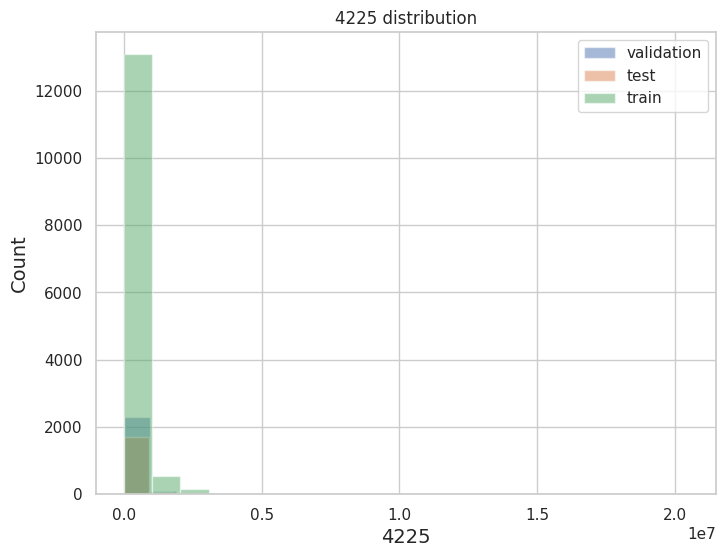

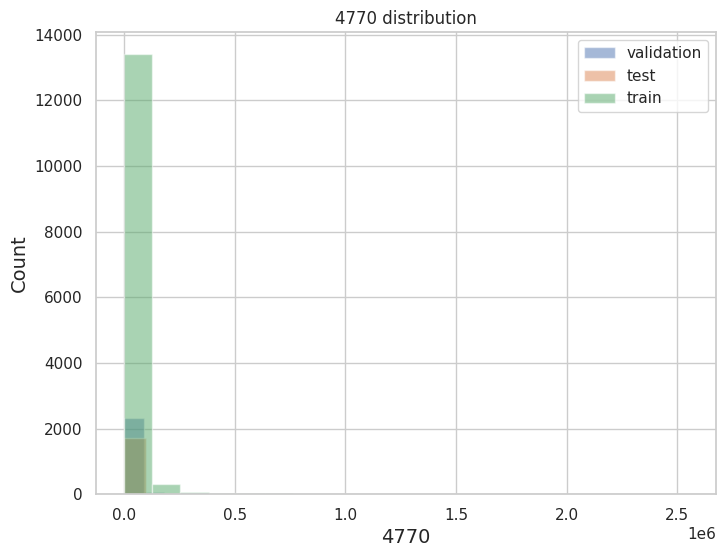

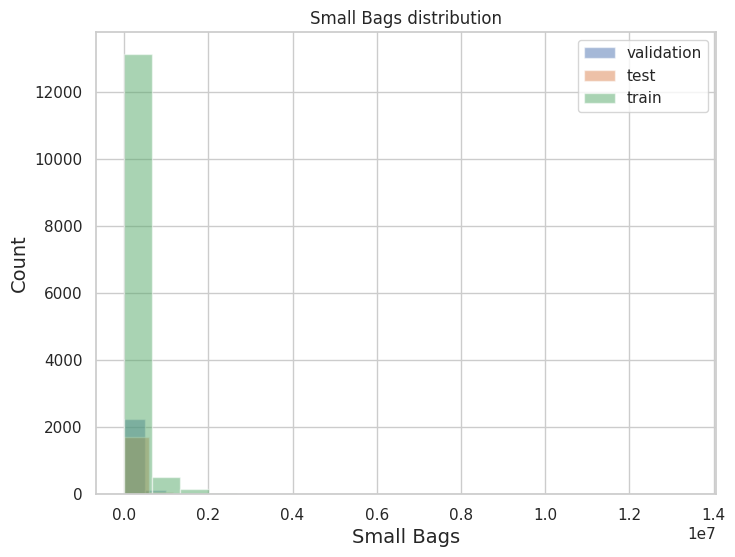

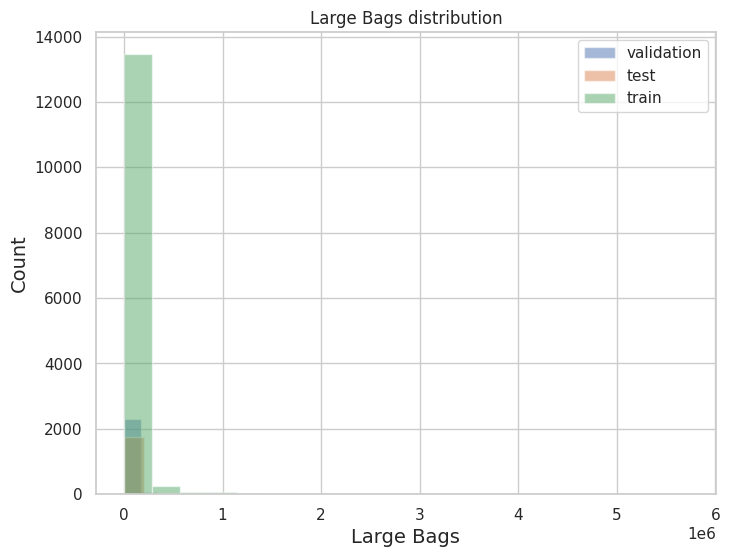

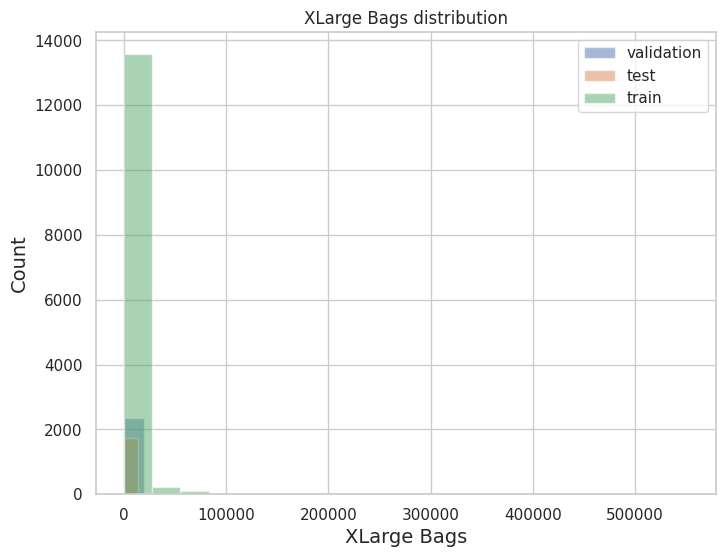

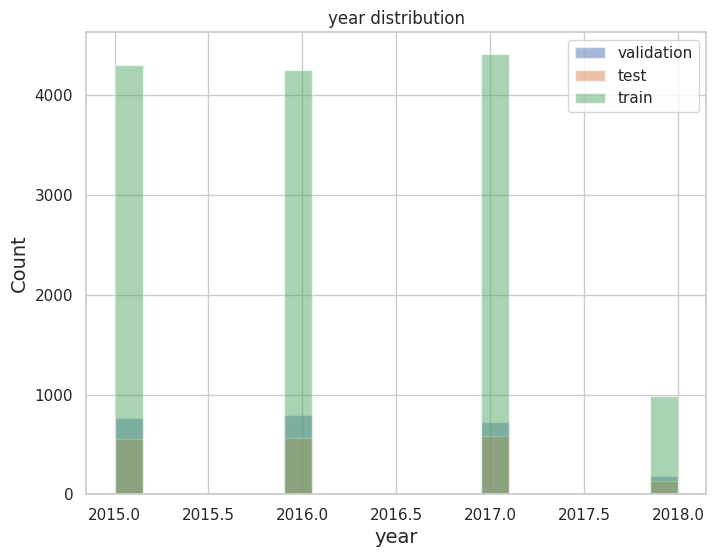

In [129]:
# Plotting the data to see the histogram distribution
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Making Predictions

In [130]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set =", r2)

Mean squared error: 3033.87
Coefficient of determination: 1.00
R^2 score on training set = 0.999999999743587


In [131]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 541.54
Coefficient of determination: 1.00
R^2 score on test set = 0.9999999999603968


In [132]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 377.47
Coefficient of determination: 1.00
R^2 score on validation set = 0.999999999966184


## Answer the following questions

**Which independent variables are useful to predict a target (dependent variable)?**

Ans: We used three methods to confirm the independent variables that had the most impact on predicting the target variable (Total Volume)

The said three methods were:
1. Correlation Matrix
2. Feature Selection using Eli5
3. The OLS method

The independent variables that have the most impact on the prediction are:
['AveragePrice', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


**Which independent variable has missing data? How much?**

The dataset had 0 missing values, 0 null values, and 0 Nan values.

**Do the training and test sets have the same data?**

The training and test data are different, they will not have the same data.

The data is split in an 80:20 ratio as train and test data. However, it can be seen from above that the distribution of data remains the same.

The mean and standard deviation of the train and test data are nearly the same.

**In the predictor variables independent of all the other predictor variables?**

I have utilized the VIF method to determine the presence of multicollinearity among predictor variables in our regression analysis.

The Variance Inflation Factor (VIF) is a statistical tool that quantifies how much the variance of the estimated regression coefficients is increased due to multicollinearity.

VIF < 1:     No multicollinearity.
1 < VIF < 5: Moderate multicollinearity.
VIF >= 5:    High multicollinearity.

**Which predictor variables are the most important?**

Based on my analysis above, I can infer that the following predictor variables are the most important:

- 4225
- 4046
- Small Bags
- Total Bags

**Do the ranges of the predictor variables make sense?**

Variables of the given dataset have varying ranges.

Many numerical features do not have a normal distribution.

Outliers are present in features like 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'.

The categorical variables such as 'Date', 'type', and 'region' have been correctly labeled and there are no missing values. However, a few variables, such exhibit multicollinearity, which may impact the accuracy of the predictive models.

While the ranges of the variables generally make sense, having variables with different ranges can cause issues when building predictive models. This can affect the model's performance and stability, as well as the interpretation of the variable's importance. Scaling can help to resolve this issue and ensure that the model is performing optimally and interpreting the importance of variables correctly.

**What are the distributions of the predictor variables?**

From the histogram plot above, we can observe that only Average Price follow the normal distribution curve while others exhibit skewness.

## Conclusion:

I successfully examined the dataset and gained valuable insights by exploring the relationships between various variables, identifying outliers, and subsequently removing them. I employed a variety of analytical tools to draw meaningful conclusions from the data.

## References:

- Sckit learn official documentation
- Eli5 official documentation
- The algorithms were referred directly from the Sckit learn official documentation.
- Visualization was referred from the Machine Learning with Scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?).
- https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/
- https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation


## License

Copyright 2023 Pritika-24

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.